In [1]:
# Lo primero que hacemos es importar todas las librerias necesarias.
#importamos librerias para tratamiento de datos
import numpy as np
import pandas as pd
import re
import math as mat

#importamos librerias la visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
# Abrimos el dataset y hacemos un chequeo rápido para saber cantidad de registros y miramos la composición del mismo.
filename = "../../dataset/properati.csv"
data = pd.read_csv(filename)

display(data.sample(n=6))
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
86376,86376,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,NaN,NaN,...,55.0,NaN,25454.545455,NaN,NaN,NaN,http://www.properati.com.ar/1b4bk_venta_depart...,DEPARTAMENTO EN BARRIO ALBERDI UBICADO EN CALL...,ALBERDI,https://thumbs4.properati.com/1/SUjXqOJjED5pGM...
116909,116909,sell,apartment,Abasto,|Argentina|Capital Federal|Abasto|,Argentina,Capital Federal,NaN,"-34.603329,-58.410789",-34.603329,...,28.0,2321.428571,2321.428571,NaN,2.0,NaN,http://www.properati.com.ar/1ccua_venta_depart...,APTO CREDITO HIPOTECARIO DPTO 2 AMBIENTES in...,Salguero 740 / APTO CREDITO HIPOTECARIO DPTO 2...,https://thumbs4.properati.com/5/AC2fFBN2eKptCs...
74940,74940,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,"-34.6081925827,-58.4637142203",-34.608193,...,73.0,1768.292683,1986.301370,NaN,NaN,1500.0,http://www.properati.com.ar/1apng_venta_depart...,DEPARTAMENTO DE 3 AMBIENTES CON DEP.DE SERVICI...,Departamento - Villa Gral.Mitre,https://thumbs4.properati.com/3/_k8C0sliP05Vwy...
11829,11829,sell,apartment,Roosevelt,|Argentina|Buenos Aires Interior|Rivadavia|Roo...,Argentina,Buenos Aires Interior,3838609.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/16d57_venta_depart...,Hermoso y comodo apartamento a estrenar. Idea...,Apartamentos en Roosevelt,https://thumbs4.properati.com/2/BqoNsGwv2JobYy...
18310,18310,sell,apartment,La Lucila,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3432310.0,"-34.505208,-58.493394",-34.505208,...,60.0,NaN,2803.333333,NaN,2.0,NaN,http://www.properati.com.ar/175u7_venta_depart...,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en La Lucila,https://thumbs4.properati.com/2/MN3_D7Az8zCt9J...
1275,1275,sell,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.40014,-58.64985",-34.400140,...,102.0,2927.927928,3186.274510,NaN,3.0,NaN,http://www.properati.com.ar/15hrj_venta_depart...,Departamento de 3 ambientes ubicado en el 6º p...,EL PORTAL | Antares | Legno - Departamento en ...,https://thumbs4.properati.com/5/TT2kr0XLfO3ebs...


(Cantidad de Filas, Cantidad de columnas) -> (121220, 26)


In [3]:
# Columna price_aprox_usd: revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.price_aprox_usd.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.price_aprox_usd.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['price_aprox_usd']).size().reset_index(name='count'))

Cantidad de registros con NaN: 20410
Porcentaje de registros con NaN: 16.837155584886982
Contamos cantidad de registros unicos:
       price_aprox_usd  count
0                 0.00      1
1              4666.62      1
2              4952.45      1
3              5000.00      2
4              5047.53      5
...                ...    ...
10359      16000000.00      1
10360      19500000.00      1
10361      22980378.29      1
10362      25000000.00      1
10363      46545445.00      1

[10364 rows x 2 columns]


<AxesSubplot:xlabel='property_type'>

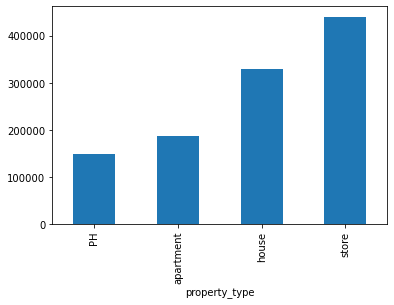

In [4]:
#graficamos el dato por tipo de propiedad con el fin de observar los rangos de precios. En esta grafica podemos observar la variación en la media de los precios que existe de acuerdo al tipo de vivienda.
data.groupby('property_type')['price_aprox_usd'].mean().plot.bar()

In [5]:
data.price_aprox_usd.describe()

count    1.008100e+05
mean     2.397006e+05
std      3.913239e+05
min      0.000000e+00
25%      8.973388e+04
50%      1.450000e+05
75%      2.650000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

### Detalle de análisis de columna `price_aprox_usd`:

* `price_aprox_usd` -> Esta columna tiene 20.410 datos nulos o su equivalente 16,83%. Consideramos que esta variable es relevante para la proyección, teniendo en cuenta que el valor por metro cuadrado cubierto y total estan calculados en esta moneda, observamos un valor máximo de 46,545,445 alejado significativamente de la media que es de 239,700.
Esta columna podriamos completarla realizando diferentes operaciones:
 
1. Extrayendo este dato de las columnas description y title
2. Diviendo el precio total en usd por el precio del metro cuadrado

### Detalle de valores extremos en la  columna `price_aprox_usd`:

En el catplot elaborado para esta variable comparada por tipo de propiedad podemos observar como en apartamentos se evidencias valores muy por encima de los valores medios, en el caso de las casas se observan algunas propiedades alejadas de la media.

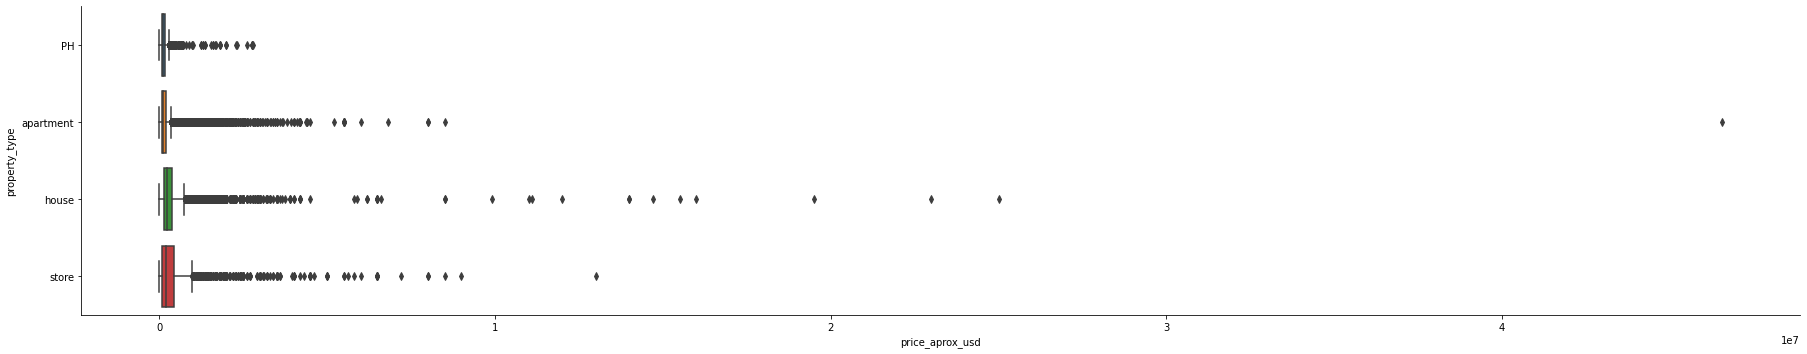

In [6]:
sns.catplot(data=data, x= 'price_aprox_usd', y="property_type", kind="box", height=5, aspect=5,)


### Regex para rellenar la columna `price_aprox_USD`:

Vamos a extraer datos de las columnas title y description para esto tomamos las diferentes expresiones de la moneda U$D, USD, usd, us$, U$S

In [7]:
data[['description', 'title']] = data[['description', 'title']].apply(lambda x: x.astype(str))

#Que pasa si la propiedad vale más de 4 digitos? el valor minimo de propiedad lleno es de 4,666.62 usd, trae tambien el dato dolares y debemos cambiar . por ,

patron = r'U\$D\s?([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)|USD\s?([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)|usd\s?([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)|us\$d\s?([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)|U\$S\s?([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)'

regex = re.compile(patron, flags = re.IGNORECASE)

precio_aprox_usd_titulo=data['title'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['price_aprox_usd'].fillna(precio_aprox_usd_titulo, inplace=True)

precio_aprox_usd_descripcion=data['description'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['price_aprox_usd'].fillna(precio_aprox_usd_descripcion, inplace=True)


In [9]:
#luego de aplicar el regex se logran recucir el porcentaje de nans al pasar del 16.84% al 14.029%
print (f'% de valores nulos que quedan luego de aplicar regex: {data.price_aprox_usd.isna().sum()/data.price_aprox_usd.shape[0]*100}')
print (f'entradas: {data.price_aprox_usd.shape[0]}')

% de valores nulos que quedan luego de aplicar regex: 14.02986305890117
entradas: 121220


In [10]:
#Vamos a transformar los datos de la columna ya que al extraer datos de regex se convirtieron en tipo object
data['price_aprox_usd'] = pd.to_numeric(data['price_aprox_usd'],errors = 'coerce')

In [12]:
print (f'% de valores nulos que quedan luego de aplicar regex: {data.price_aprox_usd.isna().sum()/data.price_aprox_usd.shape[0]*100}')
print (f'entradas: {data.price_aprox_usd.shape[0]}')

% de valores nulos que quedan luego de aplicar regex: 16.837155584886982
entradas: 121220
